<a href="https://colab.research.google.com/github/Sonypriyasonu/Profit_Prediction/blob/main/ProfitPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Profit Prediction 
This particular dataset holds data from 50 startups in New York, California, and Florida. The features in this dataset are R&D spending, Administration Spending, Marketing Spending, State and P
rofit
1. R&D spending: The amount which startups are spending on Research and development.
2. Administration spending: The amount which startups are spending on the Admin panel.
3. Marketing spending: The amount which startups are spending on marketing strategies.
4. State: To which state that particular startup belongs.
5. Profit: How much profit that particular startup is making.

##Importing libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.formula.api as smf
import statsmodels.api as smf
from statsmodels.graphics.regressionplots import influence_plot
df=pd.read_csv('https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Analyzing the data

Check number of rows and columns

In [11]:
df.shape

(50, 5)

Schema of Dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [13]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [15]:
df.size

250

Datatypes in Dataset

In [16]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

Check for NULL Values

In [17]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Statistical Analysis of the Dataset

In [18]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


##EDA on dataset

Correlation Matrix

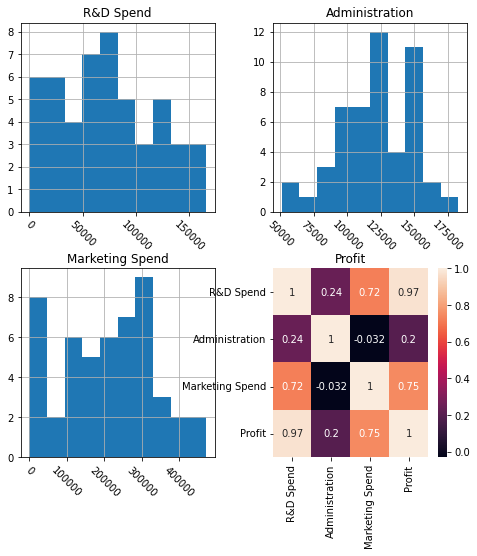

In [20]:
df.hist(xrot=-45,figsize=(8,8))
c=df.corr().round(4)
sns.heatmap(data=c,annot=True)
plt.show()

Correlation between the columns

In [21]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [22]:
correlations=df.corr(method='pearson')
print(correlations)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


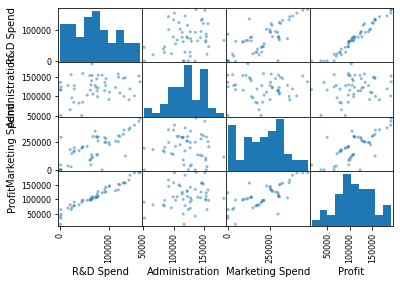

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

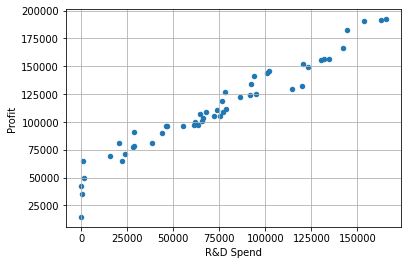

In [24]:
df.plot.scatter(x='R&D Spend',y='Profit')
plt.grid()
plt.show()

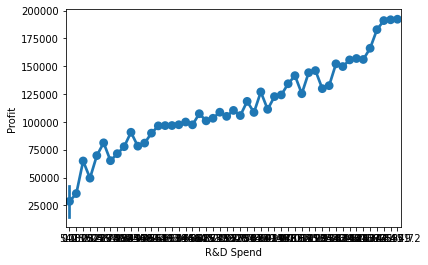

In [25]:
sns.pointplot(x='R&D Spend',y='Profit',data=df)
plt.show()

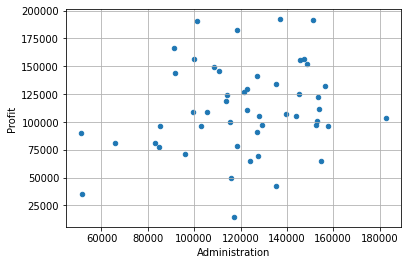

In [26]:
df.plot.scatter(x='Administration',y='Profit')
plt.grid()
plt.show()

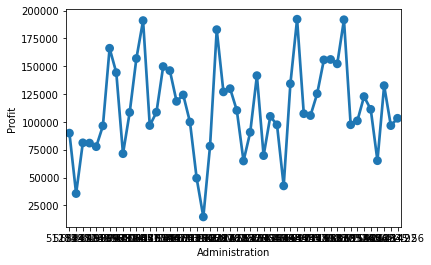

In [27]:
sns.pointplot(x='Administration',y='Profit',data=df)
plt.show()

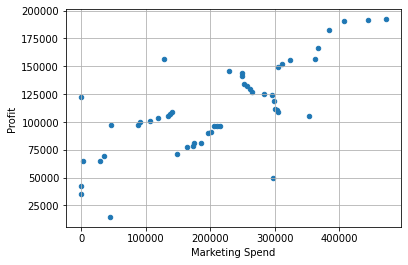

In [28]:
df.plot.scatter(x='Marketing Spend',y='Profit')
plt.grid()

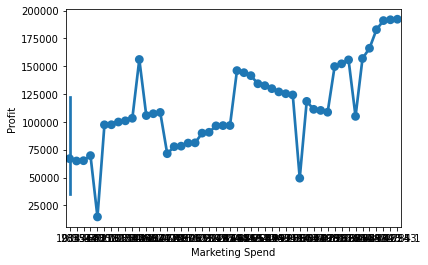

In [29]:
sns.pointplot(x='Marketing Spend',y='Profit',data=df)
plt.show()

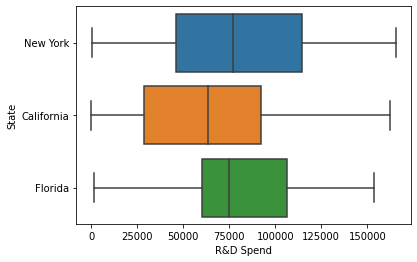

In [30]:
sns.boxplot(x='R&D Spend',y='State',data=df)
plt.show()

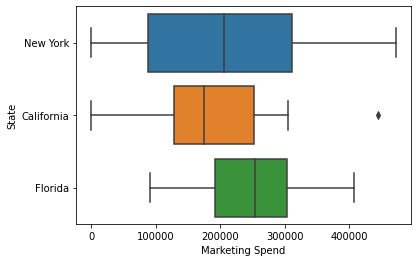

In [31]:
sns.boxplot(x='Marketing Spend',y='State',data=df)
plt.show()

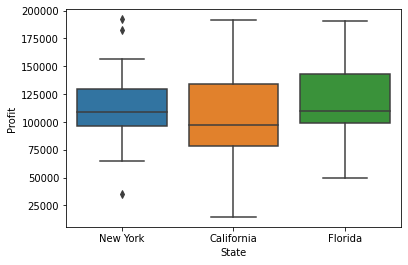

In [32]:
sns.boxplot(x='State',y='Profit',data=df)
plt.show()

### Model Development

In [40]:
x=df.iloc[:,:-1].values
y=df.iloc[:,4].values

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
x[:, 3]=labelencoder.fit_transform(x[:, 3])
x1=pd.DataFrame(x)
x1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=0)
x_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

In [41]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print('model has been trained successfully')

model has been trained successfully


In [42]:
y_pred=model.predict(x_test)
y_pred

array([104055.1842384 , 132557.60289702, 133633.01284474,  72336.28081054,
       179658.27210893, 114689.63133397,  66514.82249033,  98461.69321326,
       114294.70487032, 169090.51127461,  96281.907934  ,  88108.30057881,
       110687.1172322 ,  90536.34203081, 127785.3793861 ])

In [43]:
testing_data_model_score=model.score(x_test,y_test)
print("Model score/performance on Testing data",testing_data_model_score)
training_data_model_score=model.score(x_train,y_train)
print("Model score/performance on Training data",training_data_model_score)


Model score/performance on Testing data 0.9355139722149947
Model score/performance on Training data 0.9515496105627431


In [44]:
df=pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual value':y_test.flatten()})
df

,Predicted value,Actual value
0,104055.184238,103282.38
1,132557.602897,144259.40
2,133633.012845,146121.95
3,72336.280811,77798.83
4,179658.272109,191050.39
5,114689.631334,105008.31
6,66514.822490,81229.06
7,98461.693213,97483.56
8,114294.704870,110352.25
9,169090.511275,166187.94


### Model Evaluation

In [45]:
from sklearn.metrics import r2_score
r2score=r2_score(y_pred, y_test)
print('R2 score of model is :',r2score*100)

R2 score of model is : 93.39448007716635


In [46]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)
print("Mean squared Eroor is :",mse*100)

Mean squared Eroor is : 6224496238.946446


In [47]:
rmse=np.sqrt(mean_squared_error(y_pred,y_test))
print("Root Mean squared Eroor is :",rmse*100)

Root Mean squared Eroor is : 788954.7666974607


In [48]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)
print("Mean squared Eroor is :",mse*100)

Mean squared Eroor is : 6224496238.946446


In [49]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :",mae)

Mean Absolute Error is : 6503.577323580028
